# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


In [3]:
cities

['huatabampo',
 'lata',
 'northam',
 'kingston',
 'olonkinbyen',
 'papatowai',
 'petropavlovsk-kamchatsky',
 'west island',
 "port saint john's",
 'waingapu',
 'qaqortoq',
 'kodiak',
 'san patricio',
 'paka',
 'paita',
 'vilyuysk',
 'edinburgh of the seven seas',
 'wailua homesteads',
 'port-aux-francais',
 'muntok',
 'labytnangi',
 'livingston',
 'hithadhoo',
 'atafu village',
 'glace bay',
 'cranbrook',
 'colonia',
 'hadibu',
 'dudinka',
 'lihue',
 'jamestown',
 'thunder bay',
 'felipe carrillo puerto',
 'fortuna',
 'ishigaki',
 'enewetak',
 'jolo',
 'grytviken',
 'kyakhta',
 'adamstown',
 'tongliao',
 'taishan',
 'nadi',
 'buala',
 'anadyr',
 'taksimo',
 'hotan',
 'geraldton',
 'pan de azucar',
 'taiohae',
 'waitangi',
 'georgetown',
 'cidade velha',
 'gadzhiyevo',
 'albany',
 'gisborne',
 'acapulco de juarez',
 'tura',
 'port pirie',
 'akcakoca',
 'bredasdorp',
 'laholm',
 'turkmenbasy',
 'kasongo-lunda',
 'blackmans bay',
 'sima',
 'salaqi',
 'susuman',
 'bilibino',
 'kudahuvadhoo

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"&q="+city
#     print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

#     # Run an API request for each of the cities
    try:
#       Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

#         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon'] 
        city_max_temp = city_weather['main']['temp_max'] 
        city_humidity = city_weather['main']['humidity'] 
        city_clouds = city_weather ['clouds']['all']
        city_wind = city_weather ["wind"]['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

#         # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | huatabampo
Processing Record 2 of Set 1 | lata
Processing Record 3 of Set 1 | northam
Processing Record 4 of Set 1 | kingston
Processing Record 5 of Set 1 | olonkinbyen
Processing Record 6 of Set 1 | papatowai
Processing Record 7 of Set 1 | petropavlovsk-kamchatsky
Processing Record 8 of Set 1 | west island
Processing Record 9 of Set 1 | port saint john's
Processing Record 10 of Set 1 | waingapu
Processing Record 11 of Set 1 | qaqortoq
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | san patricio
Processing Record 14 of Set 1 | paka
Processing Record 15 of Set 1 | paita
Processing Record 16 of Set 1 | vilyuysk
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | wailua homesteads
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | muntok
Processing Record 21 of Set 1 | labytnangi
Processing Record 22 of Set

Processing Record 42 of Set 4 | tolanaro
Processing Record 43 of Set 4 | igarka
Processing Record 44 of Set 4 | la toma
Processing Record 45 of Set 4 | ola
Processing Record 46 of Set 4 | juva
Processing Record 47 of Set 4 | boa vista
Processing Record 48 of Set 4 | leava
Processing Record 49 of Set 4 | palangkaraya
Processing Record 0 of Set 5 | natal
Processing Record 1 of Set 5 | luderitz
Processing Record 2 of Set 5 | houlton
Processing Record 3 of Set 5 | toga village
City not found. Skipping...
Processing Record 4 of Set 5 | umluj
Processing Record 5 of Set 5 | spas-klepiki
Processing Record 6 of Set 5 | carutapera
Processing Record 7 of Set 5 | zangguy
City not found. Skipping...
Processing Record 8 of Set 5 | summit park
Processing Record 9 of Set 5 | plettenberg bay
Processing Record 10 of Set 5 | badger
Processing Record 11 of Set 5 | new norfolk
Processing Record 12 of Set 5 | copiapo
Processing Record 13 of Set 5 | barra
Processing Record 14 of Set 5 | north bend
Processing

Processing Record 35 of Set 8 | meizhou
Processing Record 36 of Set 8 | palmares do sul
Processing Record 37 of Set 8 | santa cruz
Processing Record 38 of Set 8 | motueka
Processing Record 39 of Set 8 | nizamabad
Processing Record 40 of Set 8 | roswell
Processing Record 41 of Set 8 | sinan
Processing Record 42 of Set 8 | maqat
Processing Record 43 of Set 8 | cole harbour
Processing Record 44 of Set 8 | saint-philippe
Processing Record 45 of Set 8 | urengoy
Processing Record 46 of Set 8 | palmer
Processing Record 47 of Set 8 | seybaplaya
Processing Record 48 of Set 8 | sungai raya
Processing Record 49 of Set 8 | pibor
City not found. Skipping...
Processing Record 0 of Set 9 | sisimiut
Processing Record 1 of Set 9 | nabire
Processing Record 2 of Set 9 | al kharj
Processing Record 3 of Set 9 | winnemucca
Processing Record 4 of Set 9 | zaragoza
Processing Record 5 of Set 9 | laela
Processing Record 6 of Set 9 | itambe
Processing Record 7 of Set 9 | tralee
Processing Record 8 of Set 9 | col

Processing Record 26 of Set 12 | trail
Processing Record 27 of Set 12 | holdrege
Processing Record 28 of Set 12 | vorkuta
Processing Record 29 of Set 12 | freetown
Processing Record 30 of Set 12 | callao
Processing Record 31 of Set 12 | phang nga
Processing Record 32 of Set 12 | san pedro pochutla
Processing Record 33 of Set 12 | port angeles
Processing Record 34 of Set 12 | hoemul-li
Processing Record 35 of Set 12 | baki
Processing Record 36 of Set 12 | douentza
Processing Record 37 of Set 12 | chegdomyn
Processing Record 38 of Set 12 | patterson
Processing Record 39 of Set 12 | coahuayana de hidalgo
Processing Record 40 of Set 12 | linqiong
Processing Record 41 of Set 12 | sadjoavato
City not found. Skipping...
Processing Record 42 of Set 12 | vryheid
Processing Record 43 of Set 12 | xapuri
Processing Record 44 of Set 12 | ambalangoda
Processing Record 45 of Set 12 | yanchep
Processing Record 46 of Set 12 | mpika
Processing Record 47 of Set 12 | sonsorol village
City not found. Skipp

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,huatabampo,26.8333,-109.6333,310.55,53,9,3.70,MX,1693078849
1,lata,40.1629,-8.3327,291.38,81,0,4.23,PT,1693078849
2,northam,51.0333,-4.2167,289.43,86,14,4.41,GB,1693078850
3,kingston,17.9970,-76.7936,305.68,55,20,2.06,JM,1693078850
4,olonkinbyen,70.9221,-8.7187,279.79,95,89,8.06,SJ,1693078850


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,huatabampo,26.8333,-109.6333,310.55,53,9,3.70,MX,1693078849
1,lata,40.1629,-8.3327,291.38,81,0,4.23,PT,1693078849
2,northam,51.0333,-4.2167,289.43,86,14,4.41,GB,1693078850
3,kingston,17.9970,-76.7936,305.68,55,20,2.06,JM,1693078850
4,olonkinbyen,70.9221,-8.7187,279.79,95,89,8.06,SJ,1693078850


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

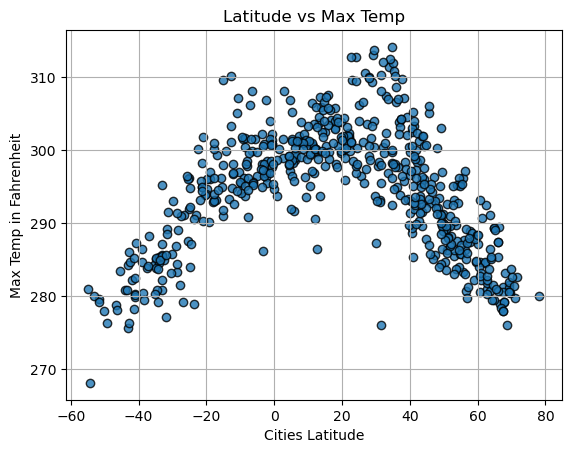

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title('Latitude vs Max Temp')
plt.xlabel('Cities Latitude')
plt.ylabel('Max Temp in Fahrenheit')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

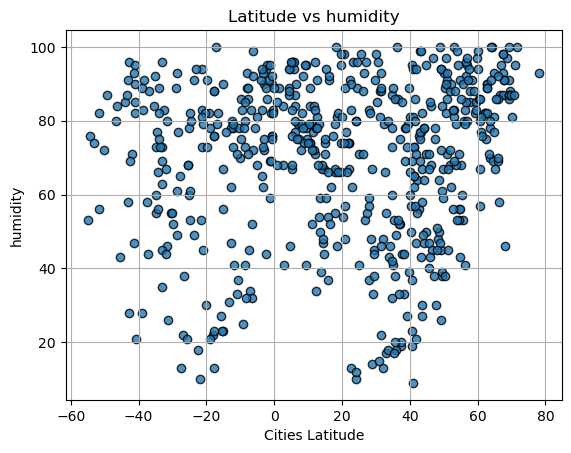

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title('Latitude vs humidity')
plt.xlabel('Cities Latitude')
plt.ylabel('humidity')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

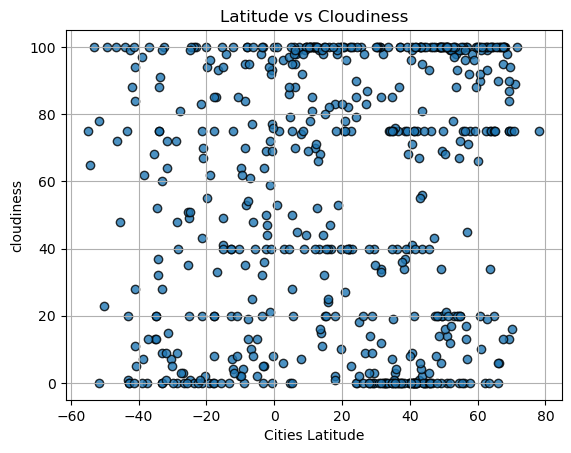

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities")

# Incorporate the other graph properties
plt.title('Latitude vs Cloudiness')
plt.xlabel('Cities Latitude')
plt.ylabel('cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

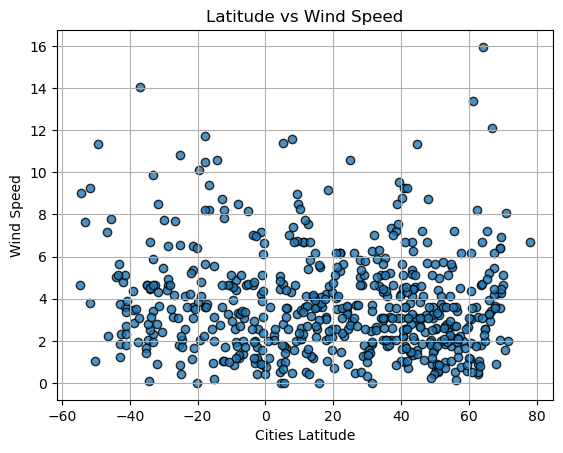

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities")

# Incorporate the other graph properties
plt.title('Latitude vs Wind Speed')
plt.xlabel('Cities Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linregress(x, y):
    x = x.values 
    model = linregress(x,y)
    slope = model.slope
    intercept = model.intercept
    r = model.rvalue
    x_vals = np.linspace(min(x), max(x),2)
    plt.plot(x_vals, x_vals * slope + intercept, "r", label= "y = " + str(slope) + "x + "+ str(intercept))
    plt.scatter(x,y)
    plt.legend()
    plt.show()
    print(f"R-value is {r}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,huatabampo,26.8333,-109.6333,310.55,53,9,3.70,MX,1693078849
1,lata,40.1629,-8.3327,291.38,81,0,4.23,PT,1693078849
2,northam,51.0333,-4.2167,289.43,86,14,4.41,GB,1693078850
3,kingston,17.9970,-76.7936,305.68,55,20,2.06,JM,1693078850
4,olonkinbyen,70.9221,-8.7187,279.79,95,89,8.06,SJ,1693078850


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,papatowai,-46.5619,169.4708,278.78,80,100,7.15,NZ,1693078850
7,west island,-12.1568,96.8225,298.14,78,75,8.23,CC,1693078851
8,port saint john's,-31.6229,29.5448,289.19,46,72,8.49,ZA,1693078851
9,waingapu,-9.6567,120.2641,295.44,86,64,3.92,ID,1693078851
14,paita,-5.0892,-81.1144,296.48,68,2,8.15,PE,1693078852


###  Temperature vs. Latitude Linear Regression Plot

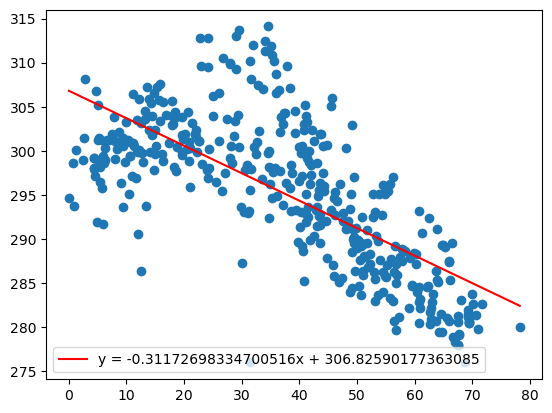

R-value is -0.7140743496243392


In [16]:
# Linear regression on Northern Hemisphere
plot_linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

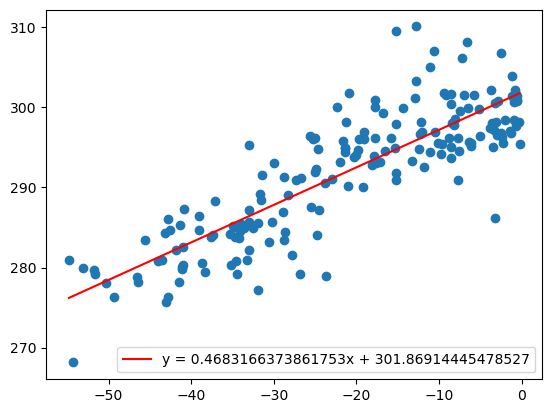

R-value is 0.8442114199127848


In [17]:
# Linear regression on Southern Hemisphere
plot_linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

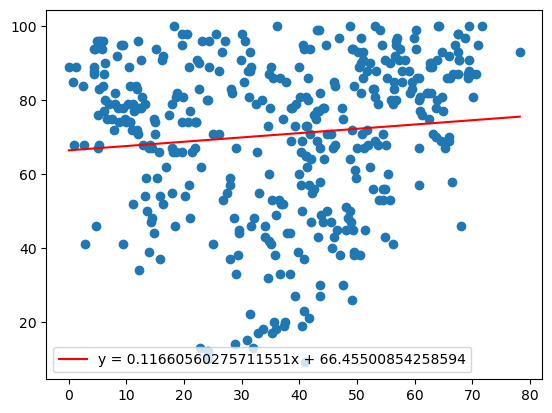

R-value is 0.10525223434159268


In [18]:
# Northern Hemisphere
plot_linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

In [19]:
# Southern Hemisphere
plot_linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

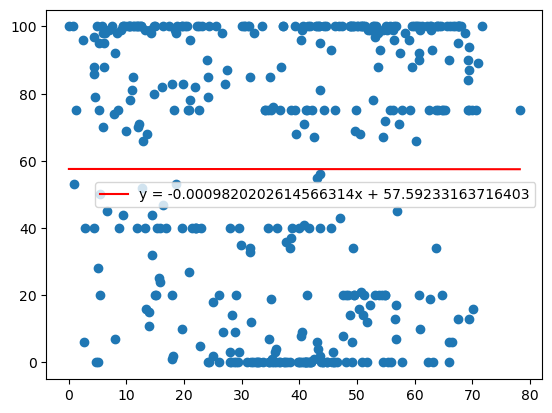

R-value is -0.0004750369188496358


In [24]:
# Northern Hemisphere
plot_linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

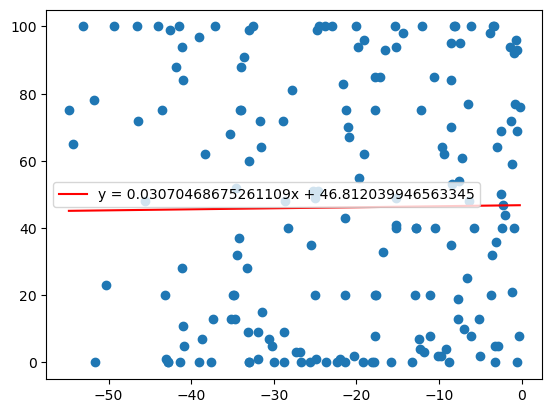

R-value is 0.012215813903649947


In [25]:
# Southern Hemisphere
plot_linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

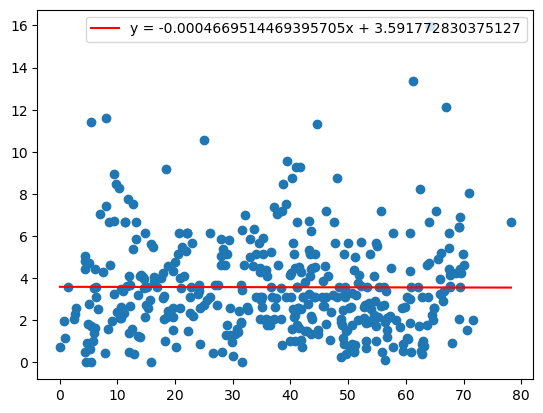

R-value is -0.003898515994176135


In [26]:
# Northern Hemisphere
plot_linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

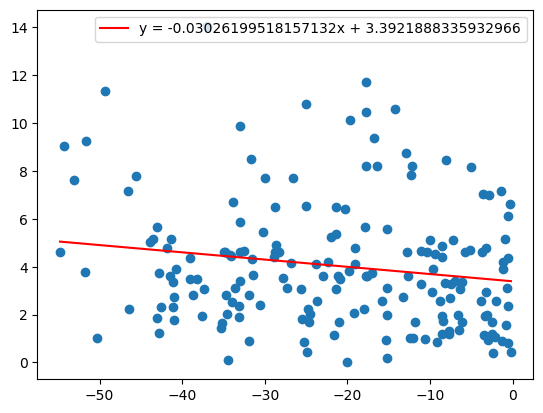

R-value is -0.1686688347697231


In [27]:
# Southern Hemisphere
plot_linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** YOUR RESPONSE HERE